## Problem 1

The aim of this exercise is to verify, for some specific examples, that i\) **OLS estimators are consistent** and ii\) **asymptotically normal**, and that iii\) **our F statistics follow F distributions in large samples**
without assuming that the error terms u are normally distributed. To do so, we will perform Monte Carlo simulations in Stata.

In the following we assume that the population model is this regression

 $$y=\beta_0+\beta_1x_1+\beta_2x_2+u_i$$

and we also assume that $x$ and $u$ are independent and $x_1 ∼ Uniform(0, 1), x2 ∼ Binomial(1, 0.3)$ and $u + 1 ∼ \chi^2(1)$.

1. Generate a dataset of 1000 observations that contains $x_1 ∼ Uniform(0, 1)$ and $u + 1 ∼ χ2(1)$. Plotboth $x_1$ and $u$.

In [20]:
using Distributions, Plots, DataFrames
x_1 = rand(1000)
chi_vals = rand(Chisq(1), 1000)
u = chi_vals .- 1

1000-element Vector{Float64}:
 -0.8395145120608023
 -0.4456643250648038
 -0.9190075154234779
 14.881605236571469
 -0.7339133082062292
  0.7543447312643659
 -0.2866822487801457
 -0.4955499503105141
 -0.9997625159444585
 -0.9760886304675988
  ⋮
 -0.45510608006085806
  0.5006453584765282
 -0.998193638206733
 -0.8281645877539962
  0.07361888784622783
 -0.5124017957323144
  1.792745808713518
 -0.9261460766832859
 -0.7156047644982839

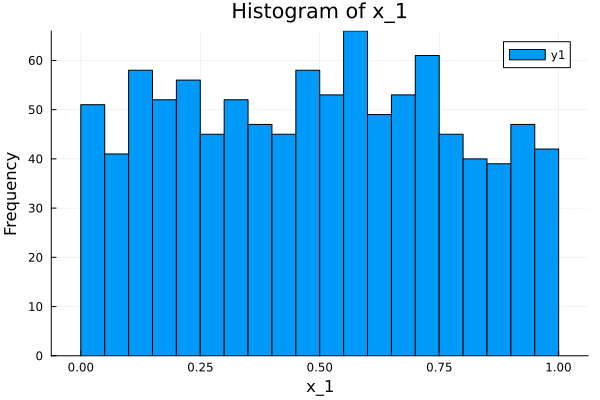

In [32]:
histogram(x_1, bins=30, title="Histogram of x_1", xlabel="x_1", ylabel="Frequency")

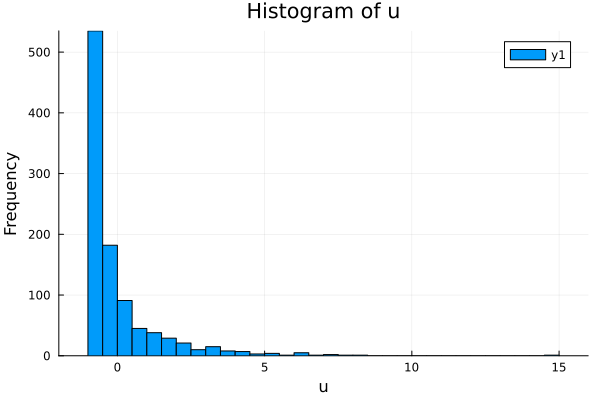

In [21]:
histogram(u, bins=30, title="Histogram of u", xlabel="u", ylabel="Frequency")

2. Now that you know how to draw random variables, clear all data and follow these steps:

    (a) Define a program (in Stata) or a function (in other languages) that generates $u + 1 ∼ \chi^2(1)$ over $N = 5$ observations and retrieves the mean and standard deviation of the generated sample

In [25]:
function f(n)
    u_plus_1= rand(Chisq(1), n)
    u= u_plus_1 .- 1
    return mean(u), std(u)
end

f (generic function with 1 method)

In [26]:
f(5)

(-0.5668252810743162, 0.3589112659308411)

    (b) Simulate the program 10 000 times. you should obtain a dataset with a variable for the mean and one for the standard deviation

In [27]:
N=10000
mean_vals = zeros(N)
sd_vals = zeros(N)
for i in 1:N
    mean_vals[i], sd_vals[i] = f(5)
end

In [29]:
df = DataFrame(mean_vals = mean_vals, sd_vals = sd_vals)
first(df, 5)

Row,mean_vals,sd_vals
,Float64,Float64
1,0.118103,1.07517
2,-0.687965,0.529055
3,0.295635,1.2164
4,-0.886172,0.0710572
5,-0.513134,0.470859


(c) Summarize and plot a histogram of the mean variable

In [30]:
mean_summary = describe(select(df, [:mean_vals]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,mean_vals,-0.00403163,-0.988398,-0.134963,5.34955,0,Float64


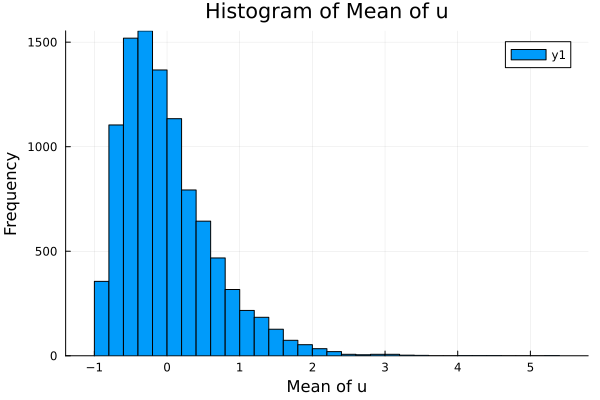

In [31]:
histogram(mean_vals, bins=30, title="Histogram of Mean of u", xlabel="Mean of u", ylabel="Frequency")